## Magnetostratigraphy

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt # our plotting buddy
from pmagpy import convert_2_magic as convert
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
from IPython.display import Image
%matplotlib inline 

### Reading input excel file

In [2]:
#set path to data file. excel file with column headings as "site", "level (m)", "Ds", "Is"
#path not required if notebook located in the same folder"
path = ''        # ADD SUBFOLDERS FROM WORKING DIR IF NEEDED. ex: Pobla_Lillet/
site_name = 'Huescar'
file = path+'Huescar_Dir.xlsx'

In [3]:
#reading input data file
xls = pd.ExcelFile(file)
chrm_directions = xls.parse(0) #first sheet (0) of the excel file parsed to variable

In [4]:
#shaping data frame
#chrm_directions = chrm_directions.set_index('sample')
# delete rows with directions of Q=4, secondary viscous component
#chrm_directions = chrm_directions[chrm_directions.Q != 4]
# erase rows without stratigraphic level ["level (m)"]
chrm_directions = chrm_directions.dropna(subset=['level (m)'])
# sort table by stratigraphic position
chrm_directions = chrm_directions.sort_values(by=['level (m)'])

### Magnetic polarity stratigraphy plot

In [5]:
chrm_directions.round(0)

,sample,level (m),Dg,Ig,Ds,Is,Int(E-6A/m),error,Q,Temp,comments,VGP lat
0,BH02A,2.0,192.0,-12.0,185.0,-24.0,244.0,7.0,3,5,200-240,-64.0
1,BH03-2,4.0,11.0,33.0,353.0,42.0,56.0,3.0,3,5,200-240,75.0
2,BH04-2A,5.0,24.0,52.0,346.0,64.0,88.0,2.0,2,5,240-280,77.0
4,BH05 2A,6.0,13.0,41.0,348.0,50.0,250.0,2.0,2,4,200-280,78.0
3,BH06A A,9.0,217.0,-57.0,172.0,-72.0,731.0,9.0,1,3,240-410,-70.0
5,BH07-1,11.0,157.0,-33.0,142.0,-28.0,510.0,7.0,2,4,320-380,-50.0
6,BH08-2,13.0,261.0,-16.0,264.0,-41.0,443.0,5.0,2,4,240-380,-18.0
7,BH09 2,15.0,351.0,53.0,319.0,51.0,4267.0,3.0,1,2,320-560,56.0
8,BH10A,16.0,238.0,-57.0,210.0,-80.0,985.0,7.0,1,2,200-350,-54.0
9,BH11-1A,18.0,182.0,-33.0,164.0,-38.0,113.0,5.0,3,5,200-240,-69.0


In [6]:
#convert declination data from 90-450
dec = chrm_directions['Ds']
inc = chrm_directions['Is']
chrm_directions["newdec"] = ""
newdec = chrm_directions["newdec"]
for value in range(len(chrm_directions)):
    if dec[value] < 90:
        newdec[value] = dec[value]+360
    else:
        newdec[value] = dec[value]

In [7]:
##sorting data by Quality 'Q'

ChRM = chrm_directions[chrm_directions["Q"] <=2]     # Take  directions of Q=1 and Q=2
ChRM_Q3 = chrm_directions[chrm_directions["Q"] ==3]  # Take directions of Q=3

print("Total Number of directions:", len(chrm_directions))
print("Directions of Quality 1:", len(chrm_directions[chrm_directions["Q"]==1]),",", round(100*len(chrm_directions[chrm_directions["Q"]==1])/len(chrm_directions),1),"%")
print("Directions of Quality 2:", len(chrm_directions[chrm_directions["Q"]==2]),",", round(100*len(chrm_directions[chrm_directions["Q"]==2])/len(chrm_directions),1),"%")
print("Directions of Quality 3:", len(chrm_directions[chrm_directions["Q"]==3]),",", round(100*len(chrm_directions[chrm_directions["Q"]==3])/len(chrm_directions),1),"%")

Total Number of directions: 31
Directions of Quality 1: 5 , 16.1 %
Directions of Quality 2: 10 , 32.3 %
Directions of Quality 3: 16 , 51.6 %


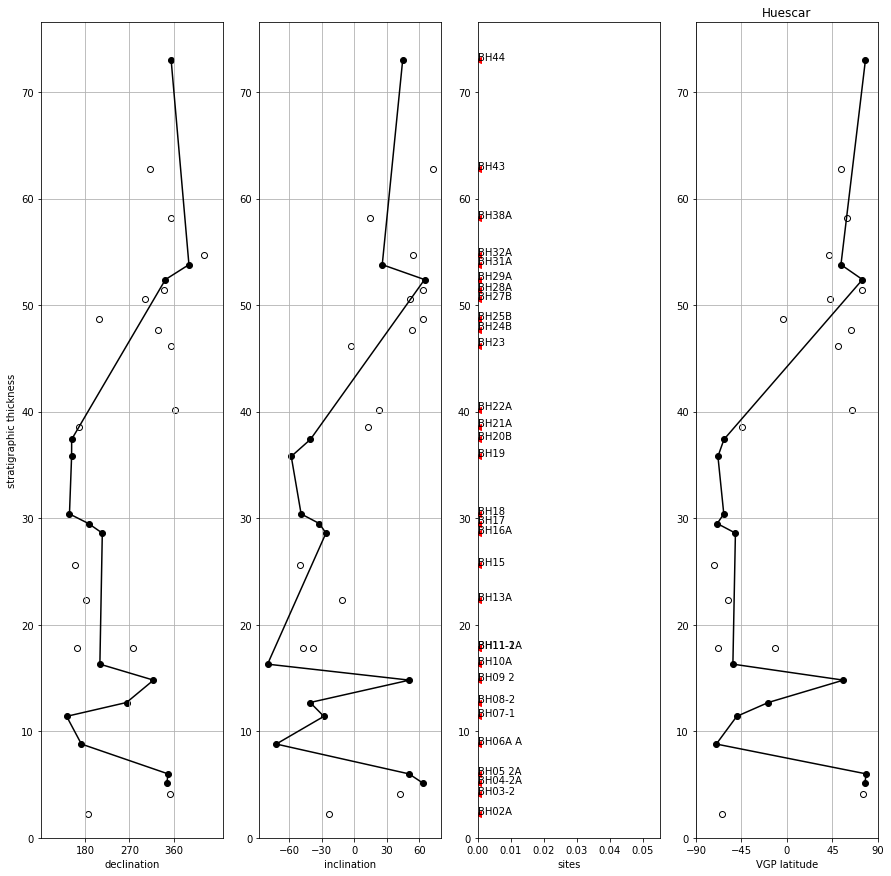

In [8]:
#plotting instructions

plt.subplots(figsize=(15, 15))

plt.subplot(1, 4, 1)
plt.plot(ChRM["newdec"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM["newdec"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM_Q3["newdec"],ChRM_Q3["level (m)"], color ='white', edgecolor ='black')
plt.xlim(left =90, right = 460)
plt.xticks(np.arange(180, 361, 90))
plt.xlabel("declination")
plt.ylim(bottom = 0)
#plt.yticks(np.arange(0, 111, 10))
plt.ylabel("stratigraphic thickness")
plt.grid(which='major', axis='both', linestyle='-')

plt.subplot(1, 4, 2)
plt.plot(ChRM["Is"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM["Is"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM_Q3["Is"],ChRM_Q3["level (m)"], color ='white', edgecolor ='black')
plt.xticks(np.arange(-60, 61, 30))
plt.xlabel("inclination")
plt.ylim(bottom = 0)
#plt.yticks(np.arange(0, 111, 10))
plt.grid(which='major', axis='both', linestyle='-')

plt.subplot(1, 4, 3)

# annotate sample names
chrm_directions['zeros'] = 0
plt.scatter(chrm_directions['zeros'],chrm_directions["level (m)"], color ='red', marker = '<')

for idx, row in chrm_directions.iterrows():
    plt.annotate(row['sample'],(row['zeros'], row['level (m)']))

plt.xlabel("sites")
plt.ylim(bottom = 0)
plt.xlim(left = 0)
#plt.yticks(np.arange(0, 111, 10))
#plt.grid(which='major', axis='both', linestyle='-')

plt.subplot(1, 4, 4)
plt.plot(ChRM["VGP lat"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM["VGP lat"],ChRM["level (m)"], color ='black')
plt.scatter(ChRM_Q3["VGP lat"],ChRM_Q3["level (m)"], color ='white', edgecolor ='black')
plt.xticks(np.arange(-90, 91, 45))
plt.xlabel("VGP latitude")
plt.ylim(bottom = 0)
#plt.yticks(np.arange(0, 111, 10))
# Add the grid
plt.grid(which='major', axis='both', linestyle='-')

plt.title(site_name)

# saving plot to file
plt.savefig(site_name+'_mgstrt.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

plt.show()

In [9]:
chrm_directions['zeros'] = 0

In [10]:
chrm_directions['zeros']

0     0
1     0
2     0
4     0
3     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
Name: zeros, dtype: int64

In [11]:
range(len(ChRM))

range(0, 15)

In [12]:
zeros = np.full((len(ChRM)),0)

In [13]:
chrm_directions.index

Int64Index([ 0,  1,  2,  4,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64')